## 1. Учитавање потребних биоблиотека

In [3]:
#Овим блоком кода увежене су одређене библиотеке и постављени њихови алиас-и како би се лакше користиле у даљем кодирању.
#Увоз библиотеке NumPy и постављање alias-а np. NumPy се често користи за рад са нумеричким подацима, низовима и матрицама.
import numpy as np
#Увоз библиотеке Pandas и постављање alias-а pd. Pandas се често користи за рад са подацима у табеларном формату, као што су  DataFrame-ови.
import pandas as pd
#Uvoz модула pyplot из библиотеке Matplotlib и постављање alias-а plt. Matplotlib се користи за визуализацију података, a pyplot је један од модула унутар Matplotlib-a.
import matplotlib.pyplot as plt
#Увоз библиотеке Seaborn и постављање alias-а sns. Seaborn се често користи за продужење могућности визуализације података и побољшање естетике графика.
import seaborn as sns
#Увоз библиотеке scikit-learn, која пружа алате за машинско учење, укључујући различите моделе, метрике и алате за обраду података.
import sklearn
import tensorflow as tf

2024-04-27 13:51:57.332928: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 2. Учитавање података

In [5]:
#Прављење имена за колоне у DataFram.у.
# imena_kolona = ['Vendor_Name', 'Model_Name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']

#Помоћу мотоде read_csv() из Pandas библиотеке учитавају се подаци  и креира објекат DataFrame. 

# Учитавање података у DataFrame
df1 = pd.read_csv('housing.csv')


#Исписивање првих n редова DataFrame-a врши се помоћу методе head().  
#Аргумент који се проследјује методи представља број жељених редова за приказ.
df1.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


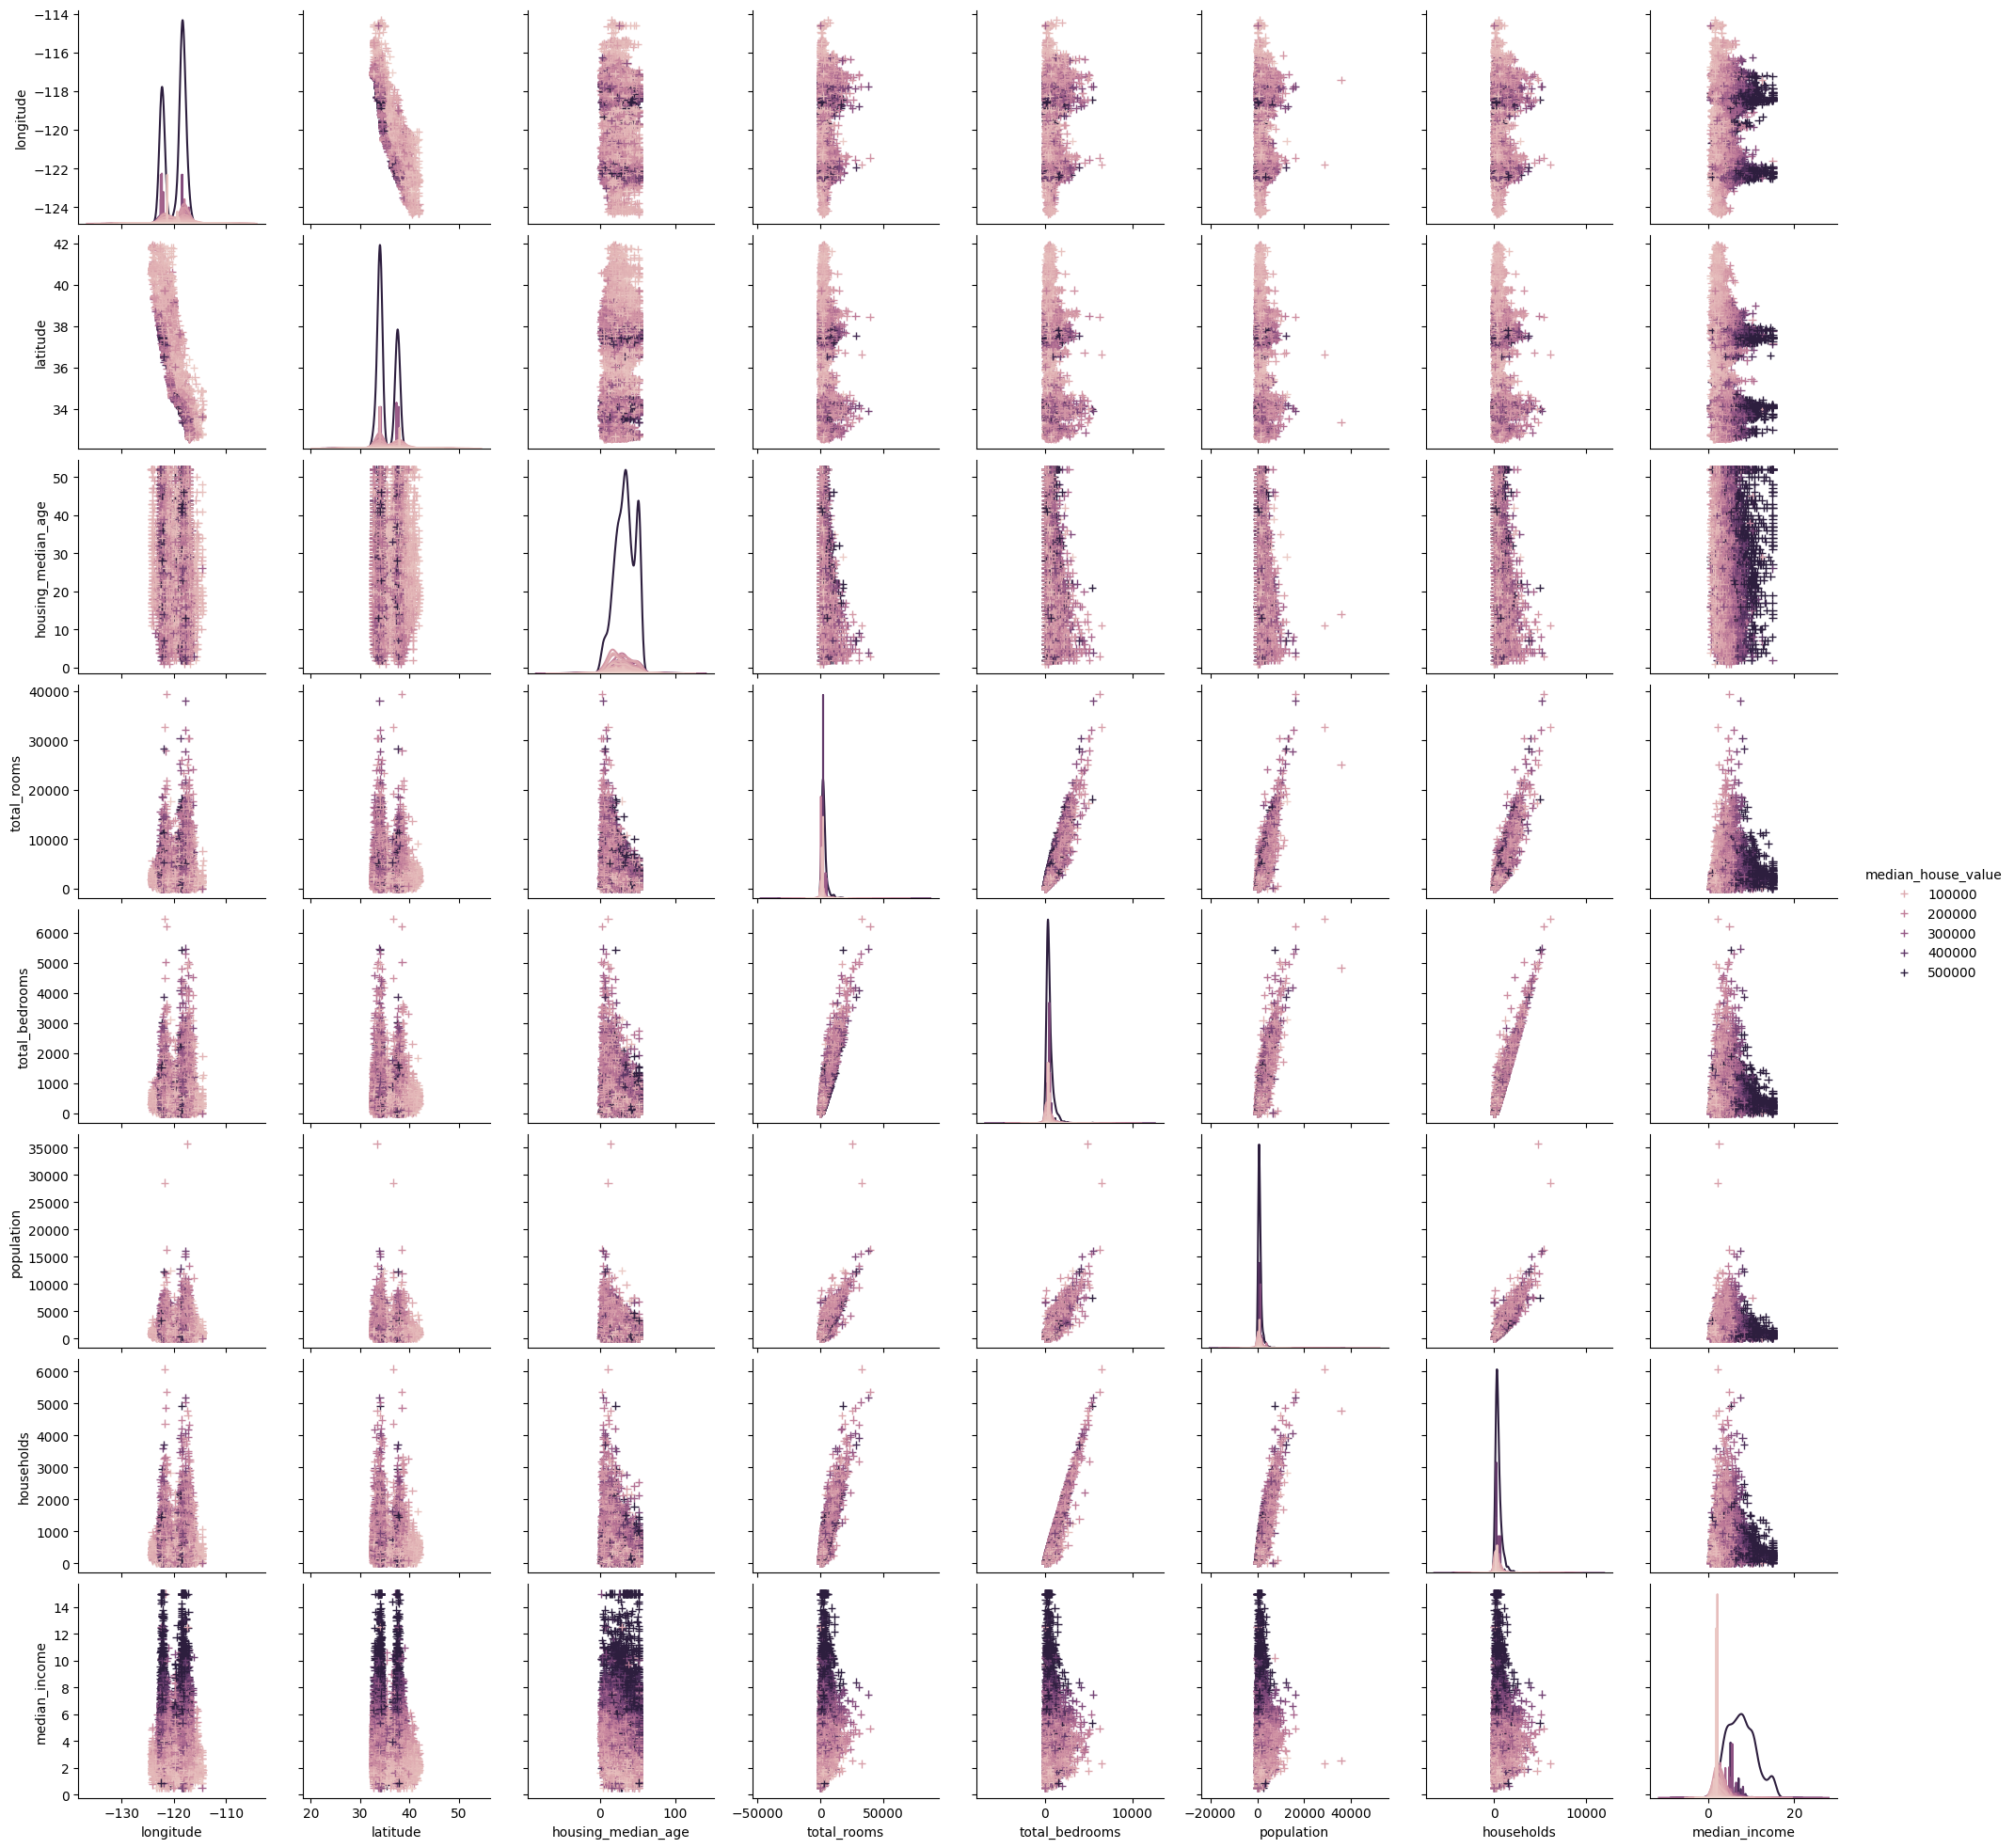

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt



sns.pairplot(
    df1.sample(len(df1)),
    plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False),
    hue='median_house_value'
)
plt.show()


# 3. Предпроцесирање података.

## 3.1. Анализа учитаних података

In [9]:
#df1.columns представља атрибут DataFramе објекта и представља листу која садржи називе колона у DataFrame-у. 
#Ово је корисно када  желимо имати преглед доступних колона.
df1.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [10]:
# Креирање новог DataFrame-а са подацима од треће до предпоследње колоне
df3 = df1.copy()


# Приказ првих неколико редова новог DataFrame-а
df3.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
## df1.shape је атрибут објекта DataFrame у Pandas-у који враћа tuple са два елемента: бројем редова и бројем колона у DataFrame-у. 
## Ова информација пружа преглед димензија DataFrame-а. 
## Tuple је уређена, непроменљива колекција података. Елементи tuple-а наведени су унутар округлих заграда (), и након што је tuple дефинисан, не може се мењати. 
## Tuple се често користе када желимо имати фиксиран скуп података који не треба мењати.
df1.shape

(20640, 10)

In [12]:
# Поред shape атрибута, још неки од основних атрибута и метода DataFrame објекта у Pandas-у.
# Ови атрибути и методе често се користе за преглед, анализу и манипулацију подацима у Pandas DataFrame-у.

In [13]:
#index атрибут враћа индекс (редне бројеве) редова у DataFrame-у.
df1.index

RangeIndex(start=0, stop=20640, step=1)

In [14]:
#values атрибут враћа податке DataFrame-а као NumPy array.
df1.values

array([[-122.23, 37.88, 41.0, ..., 8.3252, 452600.0, 'NEAR BAY'],
       [-122.22, 37.86, 21.0, ..., 8.3014, 358500.0, 'NEAR BAY'],
       [-122.24, 37.85, 52.0, ..., 7.2574, 352100.0, 'NEAR BAY'],
       ...,
       [-121.22, 39.43, 17.0, ..., 1.7, 92300.0, 'INLAND'],
       [-121.32, 39.43, 18.0, ..., 1.8672, 84700.0, 'INLAND'],
       [-121.24, 39.37, 16.0, ..., 2.3886, 89400.0, 'INLAND']],
      dtype=object)

In [15]:
#dtypes атрибут враћа типове података (dtype) за сваку колону у DataFrame-у.
df1.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [16]:
# метода info() приказује информације о DataFrame-у, укључујући број ненултих вредности и типове података за сваку колону,као и заузимање меморије.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## 3.2. Анализа и обрада недостајућих података и дупликата

In [18]:
# За решавање проблема недостајућих података у Pandas DataFrame-у, користимо различите методе и функције.

# За проверу недостајућих вредности у DataFrame-у можемо користити метод isnull():
#nedostajuce_vrednosti = df.isnull()

# За брисање редова са недостајућим подацима користимо dropna():
#df_bez_nedostajucih = df.dropna()

# За попуњавање недостајућих вредности користимо fillna():
#df_popunjeno = df.fillna(vrednost)

# Друге корисне функционалности укључују:
# - interpolate(): интерполација недостајућих вредности
# - replace(): замена недостајућих вредности са одређеним вредностима
# - mean(), median(), mode(): попуњавање недостајућих вредности статистичким параметрима
# Ове функције играју кључну улогу у раду са недостајућим подацима и обезбеђују конзистентност и анализу података.

In [19]:
# Проверавамо колико има укупно недостајућих података по колонама
# Метод isnull() враћа DataFrame са буловим вредностима (True/False) где врдност True представља место где су вредности недостајуће.
# Сумирање по колонама са методом sum() даје укупан број недостајућих вредности по колонама.
df1.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

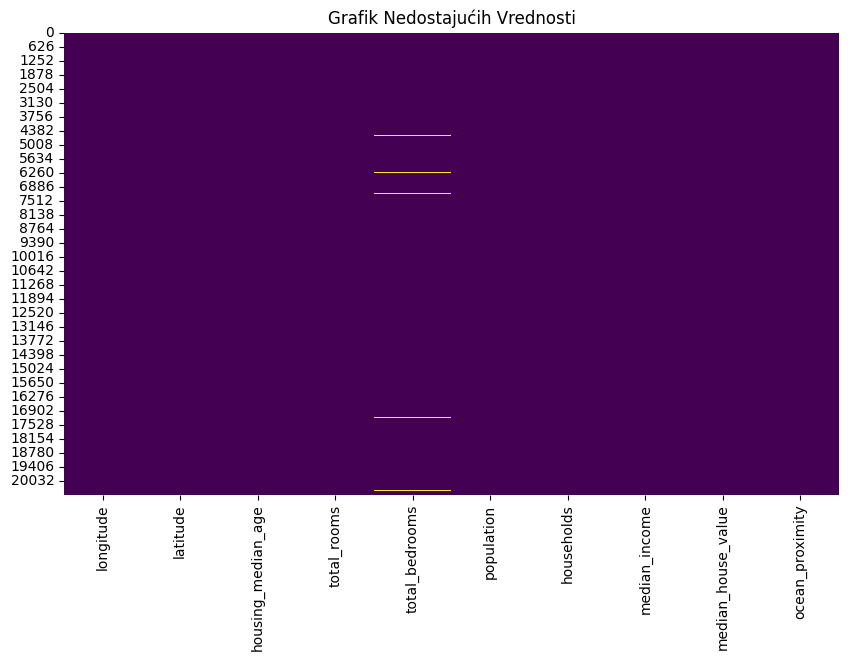

In [20]:
# Графички приказ недостајућих вредности
plt.figure(figsize=(10, 6))
sns.heatmap(df1.isnull(), cbar=False, cmap='viridis')
plt.title('Grafik Nedostajućih Vrednosti')
plt.show()

In [21]:
# Провера дупликата
duplikati = df1[df1.duplicated()]

# Приказ дупликата
# print("Broj duplikata:", len(duplikati))
# print("\nPrimeri duplikata:")
print(duplikati)
df1 = df1.drop_duplicates()
print("\nInformacije o DataFrame-u nakon uklanjanja duplikata:")
print(df1.info())


Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []

Informacije o DataFrame-u nakon uklanjanja duplikata:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB
None


In [22]:
duplikati = df1[df1.duplicated()]

## 3.3. Издвајање вредности улазних и излазних атрибута из сета података за тренирање и тестирање-евалуацију модела

In [60]:

# Прво ћемо издвојити излазне податке
# У нашем случају, то је последња колона .
# Узима се колona и користи функција np.array() из NumPy библиотеке за претварање у NumPy низ.
# Узете вредности колоне пакујемо у низ који садржи вредности из колоне 'ERP' у DataFrame-у.
# Ово радимо јер већина ML алгоритама ради са структурама података као што су низ или матрица.
# Најбоље раде са матрицама и већина ради са матрицама
y1 = np.array(df1['median_house_value'])


In [61]:
# Приказујемо сада елементе низа y1. 
print(y1)

[452600. 358500. 352100. ...  92300.  84700.  89400.]


In [62]:
# За проверу да ли су сви подаци ту искористићемо функција len(y1) враћа дужину низа y1, односно број елемената у низу.
#Ова вредност мора да се поклапа са бројем редова у датафрејму.
len(y1)

20640

In [63]:
# Креирање новог DataFrame-а са подацима од треће до предпоследње колоне
df2 = df1.iloc[:,:-1].copy()

# Приказ првих неколико редова новог DataFrame-а
df2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
le = LabelEncoder()

In [96]:
columns_to_encode = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
df3 = df2[columns_to_encode].apply(lambda col: le.fit_transform(col))

In [97]:
df3

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,170,515,40,733,128,296,125,12416
1,171,513,20,5255,1103,2346,1129,12411
2,169,512,51,1316,189,469,176,11941
3,168,512,51,1123,234,531,218,10269
4,168,512,51,1476,279,538,258,6656
...,...,...,...,...,...,...,...,...
20635,284,675,24,1514,373,818,329,740
20636,272,676,17,556,149,330,113,3179
20637,271,670,16,2103,484,980,432,1037
20638,261,670,17,1709,408,714,348,1405


In [98]:
# Издвајамо сада и улазне варијабле 
# Користи се функција np.array() из NumPy библиотеке за претварање DataFrame-а у NumPy матрицу.
# ово је низ низова тј. реодви су низови узорака, а колоне су атрибути-карактеристике.
x1 = np.array(df3)


In [99]:
# Приказујемо сада елементе матрице x1. У њој су садржане вредности свих улазних променљивих од интереса по реду.
print(x1)

[[  170   515    40 ...   296   125 12416]
 [  171   513    20 ...  2346  1129 12411]
 [  169   512    51 ...   469   176 11941]
 ...
 [  271   670    16 ...   980   432  1037]
 [  261   670    17 ...   714   348  1405]
 [  269   664    15 ...  1360   529  2752]]


In [100]:
# Функција len(x) враћа број редова у матрици x1, што је еквивалентно броју узорака у подацима, тј. броју редова. 
len(x1)


20640

In [101]:
x1.shape

(20640, 8)

In [102]:
# Као што видимо имамо скуп улазних падатака спакован у матрицу, сада је потребно да направимо и матрицу излазних тј. да трансформишемо низ у матрицу 
# То радимо коришћењем методе reshape(-1,1)
# Примена reshape(-1,1) на низу y1 претвара у матрицу са само једном колоном.
# Ово је корисно када радимо са алгоритмима који изискују 2D формат за циљну променљиву.
y1 = y1.reshape(-1, 1)

In [103]:
# Ако сада извршимо проверу видећемо да y1 представља ништа друго него матрицу са 209 редова и 1 колоном.
y1.shape


(20640, 1)

In [104]:
x1.shape

(20640, 8)

In [105]:
# Проверамо сада да ли је број линија исто то је битно иначе нећемо успети да креирамо сетове за тренирање и евалуацију-тестирање модела. 
# Као што видимо овде је то задовољено.
len(x1)==len(y1)

True

## 3.4. Скалирање података 

In [107]:
# Увоз класе MinMaxScaler из модула sklearn.preprocessing.
# MinMaxScaler се користи за нормализацију података тако да се вредности скалирају на одређени опсег, обично (0, 1).
# Ово је корисно када желимо да обезбедимо да све функције имају сличан утицај на модел, посебно код алгоритама који су осетљиви на различите скале.

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [108]:
# Претвара податке тако да они имају средњу вредност 0 и стандардну девијацију 1.
# Идеалан за алгоритме који захтевају нормално расподељене податке
# Креирање објекта класе MinMaxScaler.
# Овај објекат ће се користити за нормализацију подата
# ка, односно пресликавање вредности тако да се налазе у опсегу (0, 1).
sc=StandardScaler()

In [109]:
xsc=sc.fit_transform(x1)

In [110]:
xsc

array([[-1.33600346,  1.0523303 ,  0.98214266, ..., -1.28809653,
        -1.14585965,  1.88280191],
       [-1.3309802 ,  1.04251852, -0.60701891, ...,  1.29226284,
         2.05062565,  1.88133306],
       [-1.34102672,  1.03761263,  1.85618152, ..., -1.07033937,
        -0.98348839,  1.74326137],
       ...,
       [-0.8286539 ,  1.81274326, -0.92485123, ..., -0.4271376 ,
        -0.16844831, -1.46000195],
       [-0.87888653,  1.81274326, -0.84539315, ..., -0.76195496,
        -0.43588334, -1.35189475],
       [-0.83870043,  1.78330792, -1.00430931, ...,  0.05117292,
         0.14037547, -0.95618715]])

## 3.5. Подела скалираних података у тренинг и тест-валидационе скупове података 

In [112]:
# Импортовање функције train_test_split из библиотеке sklearn.model_selection.
# Ова функција се користи за раздвајање података на тренинг и тест скупове.

from sklearn.model_selection import train_test_split


In [127]:
# овде сада сет података делимо на део за тренинг и део за евалуацију модела
#Користи функцију train_test_split из библиотеке sklearn.model_selection за раздвајање података на тренинг и тест скупове.
# X_train1, X_test1, y_train1, y_test1 = train_test_split(xmms, y1, test_size = 0.2, random_state = 1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(xsc, y1, test_size = 0.2, random_state = 1)

#x1 представља матрицу улазних података (варијабли) које се користе за тренирање модела.
#y1 представља низ целевних (излазних) података које желимо предвидети или класификовати.
#test_size = 0.2 означава да ће 20% података бити коришћено за тест скуп, док ће 80% бити коришћено за тренинг скуп.
#random_state = 1 поставља семплење података да буде детерминистичко, што значи да ако поновимо исти позив функције train_test_split са истим подацима и random_state, 
#добићемо исте тренинг и тест скупове. Ово је корисно ради репродукције резултата.
#На крају, променљиве X_train, X_test, y_train, и y_test садрже податке подељене на тренинг и тест скупове, које можемо користити за тренирање и евалуацију модела.

In [128]:
X_train1

NameError: name 'X_train1' is not defined

In [ ]:
X_train1.shape

In [ ]:
X_test1.shape

In [ ]:
y_train1.shape

In [ ]:
y_test1.shape

In [141]:
X_train2.shape

(16512, 8)

In [142]:
X_test2.shape

(4128, 8)

In [143]:
y_test2.shape

(4128, 1)

In [144]:
y_test2.shape

(4128, 1)

## 4.1. Функција евалуације модела


In [146]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [158]:
def evaluate(y_pred,y_true,name):
    
    
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(name)
    print('Srednja kvadratna greška: ' + str(round(mse,2)))
    print('Koren srednje kvadratna greška: ' + str(round(rmse,2)))
    print('Srednja apsolutna greška (Mean Absolute Error - MAE):' + str(round(mae,2)))
    print('Koeficijent determinacije (R-squared): ' + str(round(r2,2)))
    print()